# Get image description from gpt4
outcome is a subset of imagenames and the corresponding answers saved to a json file 

In [1]:
import json
import os
import numpy as np
from PIL import Image
from openai import OpenAI

In [2]:
%run _get_key.py
from config import default_prompt, gpt4_res_json_path

## get inference result from gpt4

In [3]:
client = OpenAI(api_key=os.environ.get('API_KEY'))

def get_openai_opinion(url: str, image_capture_prompt=default_prompt) -> dict:
    print(f'Sending request for {url}')
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": image_capture_prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": url,
                        },
                    },
                ],
            }
        ],
        max_tokens=400,
    )
    print('Received response')
    json_resp = response.choices[0].message.content
    tokens_used = response
    try:
        # print(f'Processing content {json_resp}')
        json_resp = json_resp.replace('```json', '').replace('```', '')
        data = json.loads(json_resp)
        # print(f'Response obtained: {data}')
        return data
    except Exception as e:
        print('Error calling openai', e)
        return dict()

In [4]:
repo = 'https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/'

res = {}
failed = {}
for file in os.listdir('rug_jpeg'):
    url =  repo + file
    print('\n', file)
    try:
        data = get_openai_opinion(url)
        res[file] = data
    except Exception as e:
        print(f'{file} failed')
        failed[file] = e

res


 9701 ARIANA TRIBAL 2.9 X 11.9.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/9701 ARIANA TRIBAL 2.9 X 11.9.jpeg
Received response

 Astro Plum.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/Astro Plum.jpeg
Received response

 Dune.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/Dune.jpeg
Dune.jpeg failed

 Circles – Blue.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/Circles – Blue.jpeg
Circles – Blue.jpeg failed

 17627 VINTAGE  5.8 X 8.5..jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/17627 VINTAGE  5.8 X 8.5..jpeg
17627 VINTAGE  5.8 X 8.5..jpeg failed

 8623 – Grass.jpeg
Sending request for https://raw.githubusercontent.com/zhangx306/moondream/main/rug_jpeg/8623 – Grass.jpeg
8623 – Grass.jpeg failed

 17630 VINTAGE  4.5 X 6.3.jpeg
Sending request for https

{'9701 ARIANA TRIBAL 2.9 X 11.9.jpeg': {'shape': 'rectangle',
  'dominant_colors': ['red', 'blue', 'beige', 'black'],
  'style': 'traditional',
  'description': 'This is a traditional hand-woven runner rug, likely of Persian origin. It features intricate patterns and symmetrical geometric shapes, bordered by detailed motifs. The craftsmanship suggests it may be antique, adding to its decorative appeal.',
  'material': 'wool',
  'suggested_title': 'Traditional Persian Runner Rug',
  'theme': 'geometric'},
 'Astro Plum.jpeg': {'shape': 'rectangle',
  'dominant_colors': ['light blue', 'purple'],
  'style': 'contemporary',
  'description': 'This contemporary rug features an artistic and abstract expression with circular patterns in light blue and purple shades, offering a fresh take on a classic motif.',
  'material': 'likely synthetic or wool blend',
  'suggested_title': 'Artistic Abstract Circular Pattern Rug',
  'theme': 'abstract'},
 '17630 VINTAGE  4.5 X 6.3.jpeg': {'shape': 'rectangl

## analyze inference results

In [5]:
print(f"# of successful inference: {len(res)}")
print(f"# of failed inference:     {len(failed)}")
perc_success= np.round(len(res)/(len(failed) + len(res)),2)
print(f"% of successful inference: {perc_success}")

# of successful inference: 125
# of failed inference:     57
% of successful inference: 0.69


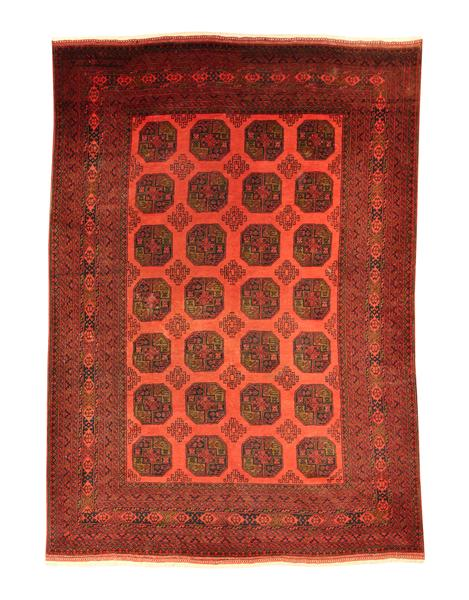

In [6]:
# inspect result
idx = 20
successes = list(res.keys())
image_name = successes[idx]
Image.open(f"rug_jpeg/{image_name}")

In [7]:
print("gpt4 inference is")
res[image_name]

gpt4 inference is


{'shape': 'rectangle',
 'dominant_colors': ['red', 'black', 'orange'],
 'style': 'traditional',
 'description': "This traditional rug features a rich red field with ornate black geometrical medallions flanked by intricate borders. It's a testament to fine craftsmanship and timeless design suitable for a variety of interiors.",
 'material': 'wool',
 'suggested_title': 'Traditional Geometric Medallion Rug',
 'theme': 'geometric'}

## save successful inference results to json

In [8]:
output_path = gpt4_res_json_path
with open(output_path, 'w') as json_file:
    json.dump(res, json_file)
